Primeiros dados
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           1           0     0.99539    -0.05889     0.85243     0.02306   
1           1           0     1.00000    -0.18829     0.93035    -0.36156   
2           1           0     1.00000    -0.03365     1.00000     0.00485   
3           1           0     1.00000    -0.45161     1.00000     1.00000   
4           1           0     1.00000    -0.02401     0.94140     0.06531   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute26  \
0     0.83398    -0.37708     1.00000      0.03760  ...     -0.51171   
1    -0.10868    -0.93597     1.00000     -0.04549  ...     -0.26569   
2     1.00000    -0.12062     0.88965      0.01198  ...     -0.40220   
3     0.71216    -1.00000     0.00000      0.00000  ...      0.90695   
4     0.92106    -0.23255     0.77152     -0.16399  ...     -0.65158   

   Attribute27  Attribute28  Attribute29  Attribute30  Attribute31  \
0      0.41078    

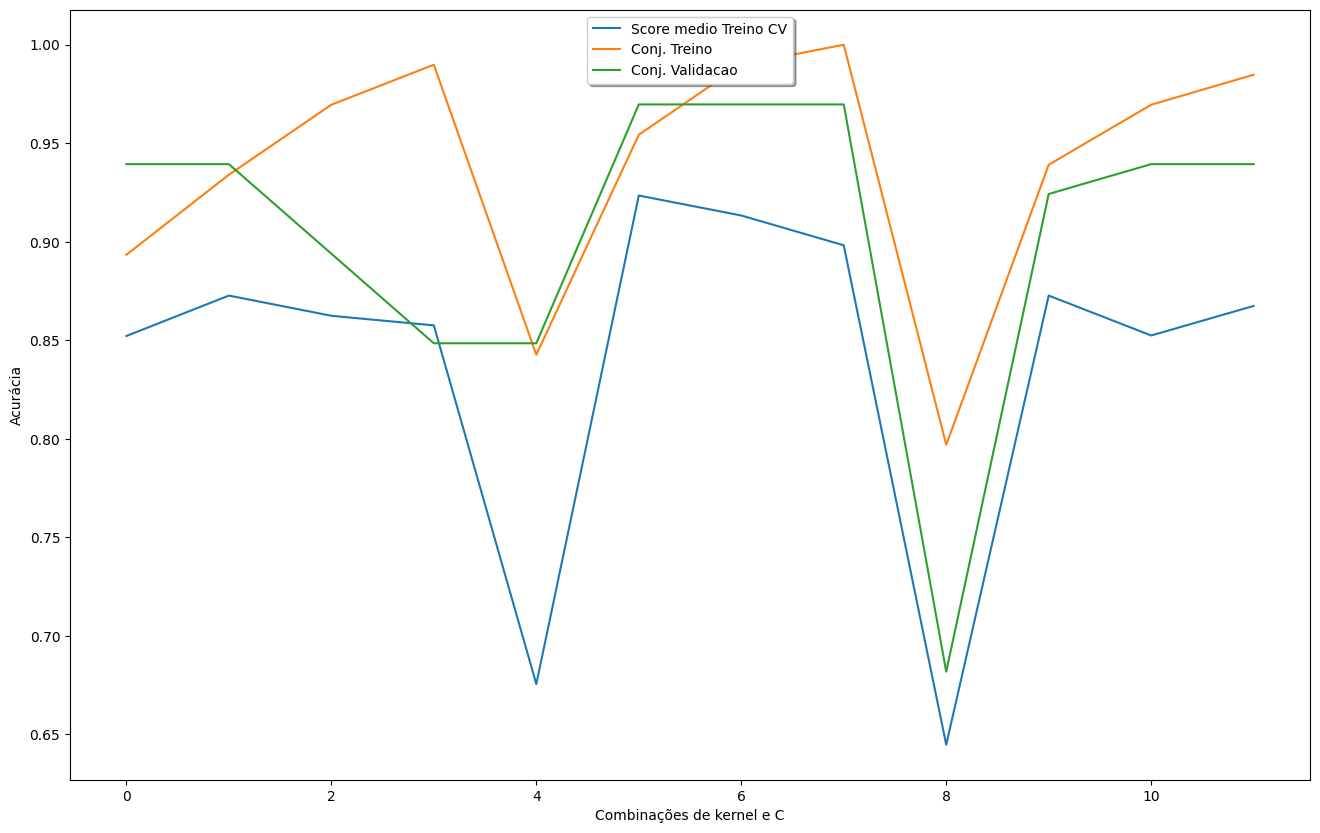

Acuracia de treinamento clf: 0.954
Acuracia de validacao clf: 0.970
Acuracia de teste clf: 0.932


In [4]:
# USANDO O SVM NA BASE DE DADOS
# TESTANDO DIFERENTES PARÂMETROS DO SVM

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import random
import pandas as pd
plt.rcParams['figure.figsize'] = [16, 10]

# definindo semente para geracao de numeros aleatorios
random.seed(10)

dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/52/data.csv")

# print("Primeiros dados")
# print(dataset.head(5))

# divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe

# usando o metodo para criar os conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

# Criando uma instância do classificador SVM
clf = svm.SVC(kernel='rbf')

# treinando o classificador
clf = clf.fit(X_train, y_train)

# Construindo o espaco de busca por configuracoes do classificador SVM
# C_range: valores do parâmetro de regularização que controla a margem de separação
#          valores menores = margem maior e mais flexível
#          valores maiores = margem menor e mais rígida
C_range = [0.1, 1, 10, 100]

# kernels: diferentes funções de kernel para transformar o espaço de características
#         'linear': kernel linear para dados linearmente separáveis
#         'rbf': kernel gaussiano para dados não-lineares
#         'poly': kernel polinomial para relações polinomiais
kernels = ['linear', 'rbf', 'poly']

# Arrays para armazenar as métricas de desempenho
scores_train = []        # Scores da validação cruzada no conjunto de treino
scores_train_full = []   # Scores no conjunto completo de treino
scores_valid = []        # Scores no conjunto de validação

# testando diferentes configurações do SVM
for kernel in kernels:
    for C in C_range:
        svm_clf = svm.SVC(kernel=kernel, C=C)
        scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
        scores_train.append(scores.mean())
        svm_clf.fit(X_train, y_train)
        scores_train_full.append(svm_clf.score(X_train, y_train))
        scores_valid.append(svm_clf.score(X_valid, y_valid))

# plotando os resultados
plt.plot(list(range(0,len(scores_train))), scores_train)
plt.plot(list(range(0,len(scores_train_full))), scores_train_full)
plt.plot(list(range(0,len(scores_valid))), scores_valid)
plt.legend(('Score medio Treino CV', 'Conj. Treino', 'Conj. Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Combinações de kernel e C')
plt.ylabel('Acurácia')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

# Salvando os scores do SVM para comparação posterior
svm_train_score = clf.score(X_train, y_train)
svm_valid_score = clf.score(X_valid, y_valid) 
svm_test_score = clf.score(X_test, y_test)

Primeiros dados
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           1           0     0.99539    -0.05889     0.85243     0.02306   
1           1           0     1.00000    -0.18829     0.93035    -0.36156   
2           1           0     1.00000    -0.03365     1.00000     0.00485   
3           1           0     1.00000    -0.45161     1.00000     1.00000   
4           1           0     1.00000    -0.02401     0.94140     0.06531   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute26  \
0     0.83398    -0.37708     1.00000      0.03760  ...     -0.51171   
1    -0.10868    -0.93597     1.00000     -0.04549  ...     -0.26569   
2     1.00000    -0.12062     0.88965      0.01198  ...     -0.40220   
3     0.71216    -1.00000     0.00000      0.00000  ...      0.90695   
4     0.92106    -0.23255     0.77152     -0.16399  ...     -0.65158   

   Attribute27  Attribute28  Attribute29  Attribute30  Attribute31  \
0      0.41078    

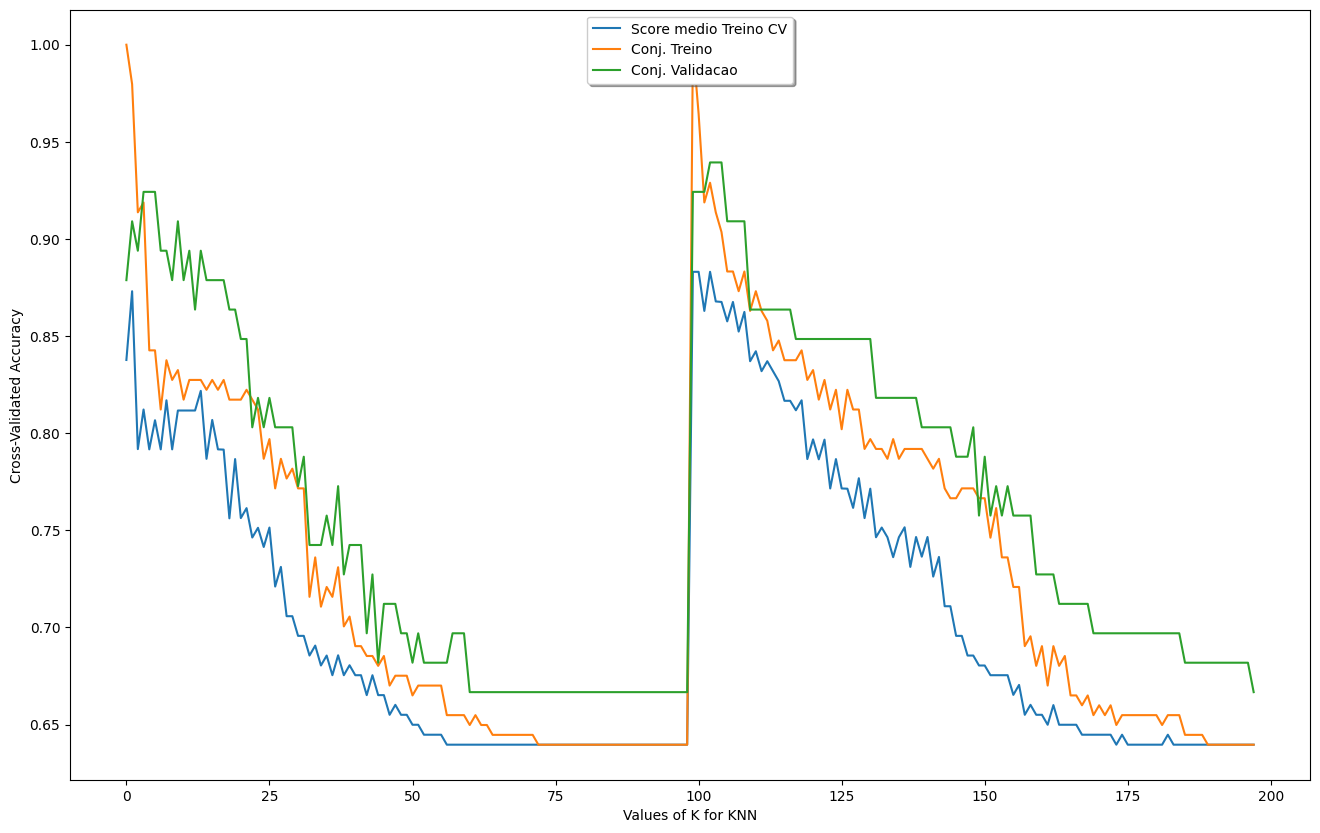

Acuracia de treinamento clf: 0.843
Acuracia de validacao clf: 0.924
Acuracia de teste clf: 0.852


In [5]:
# USANDO O K-NN NA BASE DE DADOS
# ESCOLHENDO VARIOS K'S PARA A BASE

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import random
plt.rcParams['figure.figsize'] = [16, 10]

# definindo semente para geracao de numeros aleatorios
random.seed(10)

dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/52/data.csv")

# print("Primeiros dados")
# print(dataset.head(5))

# divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe

# usando o metodo para criar os conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier()

# treinando o classificador
clf = clf.fit(X_train, y_train)

# construindo o espaco de busca por configuracoes do classificador
k_range = range(1, 100) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
vet_distancias = ["euclidean", "manhattan"]

# usar iteração para calcular diferentes k nos modelos, e retornar a acurácia média baseada na validação cruzada
for k in vet_distancias:
  for j in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=j, metric=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores_train.append(scores.mean())
    knn.fit(X_train, y_train)
    k_scores_train_full.append(knn.score(X_train, y_train))
    k_scores_valid.append(knn.score(X_valid, y_valid))

plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Score medio Treino CV', 'Conj. Treino', 'Conj. Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" % clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" % clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" % clf.score(X_test, y_test))

# Salvando os scores do KNN para comparação posterior
knn_train_score = clf.score(X_train, y_train)
knn_valid_score = clf.score(X_valid, y_valid) 
knn_test_score = clf.score(X_test, y_test)


In [6]:
# Comparação dos desempenhos

print("\nComparação dos desempenhos:")
print("\nKNN:")
print(f"Acurácia de treinamento: {knn_train_score:.3f}")
print(f"Acurácia de validação: {knn_valid_score:.3f}")
print(f"Acurácia de teste: {knn_test_score:.3f}")

print("\nSVM:")
print(f"Acurácia de treinamento: {svm_train_score:.3f}")
print(f"Acurácia de validação: {svm_valid_score:.3f}") 
print(f"Acurácia de teste: {svm_test_score:.3f}")

# Podemos ver que o modelo SVM obteve um score superior no dataset.


Comparação dos desempenhos:

KNN:
Acurácia de treinamento: 0.843
Acurácia de validação: 0.924
Acurácia de teste: 0.852

SVM:
Acurácia de treinamento: 0.954
Acurácia de validação: 0.970
Acurácia de teste: 0.932


Realizar a busca por hiperparâmetros para os modelos KNN e SVM utilizando a base de dados do UCI Ionosphere. 
A atividade tem como foco a análise do desempenho dos modelos em diferentes etapas do processo de treinamento.

Lembre-se de ajustar os hiperparâmetros considerando os conjuntos de treinamento e validação.

Apresente os desempenhos dos modelos nas seguintes etapas:

Desempenho obtido durante o ajuste dos modelos.
Desempenho dos modelos nos dados de validação utilizados para a escolha dos hiperparâmetros.
Desempenho final dos modelos aplicados aos dados de teste.

Os resultados devem ser apresentados de forma clara e objetiva (descrição textual)

Envie um relatório contendo apenas os desempenhos (treinamento, validação e teste) e o link para o repositório com o código completo (não esqueça de compartilhar o código!).

Utilize os scripts e materiais de referência disponibilizados no Classroom como base para o desenvolvimento da atividade.

A atividade é individual e deve ser desenvolvida de forma autônoma.

Certifique-se de comentar o código e explicar brevemente as escolhas realizadas durante o processo de busca de hiperparâmetros e avaliação dos modelos.